# Visualize domains and aggregated results

In [1]:
import os
import pandas as pd
import numpy as np

#Developed libraries for working with simulation results
import plots.saturated_steady_state as sssp
import analyses.transient as translys
from data_reader import data_processing as proc

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

## Parent directories

In [2]:
results_dir = "Y:/Home\khurana/4. Publications/Paper3/Figurecodes"
output_dir = "Y:/Home\khurana/4. Publications/Paper3/Figurecodes"
raw_dir = "E:/Richards_flow/RF_big_sat_2"

## Aggregate Results - load data

In [3]:
filename = "concdata_with_sat_26092021.csv"#concdata_03082021.csv"
mfdata = pd.read_csv(os.path.join(results_dir, filename))
print(mfdata.shape)
print(mfdata.columns)
filename = "conc_comparison_with_sat_26092021.csv"#03082021.csv"
mfdata_comparison = pd.read_csv(os.path.join(results_dir, filename))
#filename = "E:/Richards_flow/RF_big_sat_2/Da_unsaturated.csv"
#mfdata_comparison = pd.read_csv(filename)
print(mfdata_comparison.shape)
print(mfdata_comparison.columns)

(882, 13)
Index(['Trial', 'Variance', 'Anisotropy', 'Regime', 'Chem', 'conc_in',
       'conc_out', 'delconc', 'reldelconc', 'normconc', 'Mean_saturation',
       'Time', 'fraction'],
      dtype='object')
(882, 18)
Index(['Trial', 'Variance', 'Anisotropy', 'Regime', 'Chem', 'conc_in',
       'conc_out', 'delconc', 'reldelconc', 'normconc', 'Mean_saturation',
       'Time', 'fraction', 'spatial_normconc_base', 'spatial_reldelconc_base',
       'normconc_spatial_fraction', 'reldelconc_spatial_fraction', 'Da63'],
      dtype='object')


In [4]:
# How many regimes and what are they called? Which chemical species?
print(mfdata.Regime.unique())
print(mfdata.Chem.unique())
print(mfdata_comparison.Regime.unique())
print(mfdata_comparison.Chem.unique())

['Medium' 'Fast' 'Slow']
['DOC' 'DO' 'Nitrate' 'Ammonium' 'Nitrogen' 'TOC']
['Medium' 'Fast' 'Slow']
['DOC' 'DO' 'Nitrate' 'Ammonium' 'Nitrogen' 'TOC']


### Scatter plot of removal of reactive species in each domain with change in breakthrough time

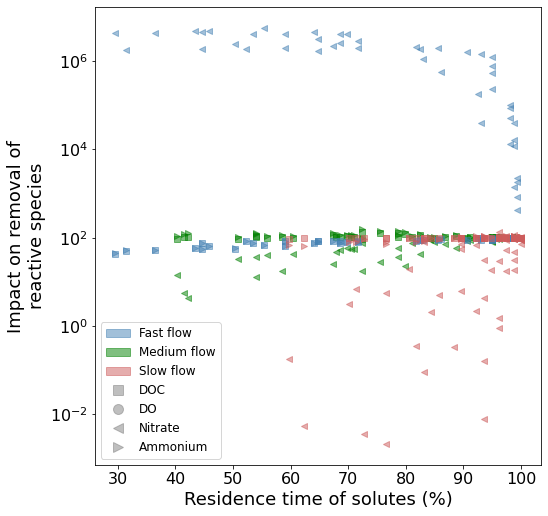

In [5]:
#Defining base parameters for figures
grey_dot = mlines.Line2D([], [], linestyle = '', marker = "o", markerfacecolor = "grey", markeredgecolor = "grey", markersize=10, label='DO', alpha = 0.5)
grey_triangle = mlines.Line2D([], [], linestyle = '', marker = "^", markerfacecolor = "grey", markeredgecolor = "grey",markersize=10, label='Nitrogen', alpha = 0.5)
grey_square = mlines.Line2D([], [], linestyle = '', marker = "s", markerfacecolor = "grey", markeredgecolor = "grey",markersize=10, label='DOC', alpha = 0.5)
empty_square = mlines.Line2D([], [], linestyle = '', marker = "d", markerfacecolor = "grey", markeredgecolor = "grey",markersize=10, label='TOC', alpha = 0.5)
empty_triangle = mlines.Line2D([], [], linestyle = '', marker = "<", markerfacecolor = "grey", markeredgecolor = "grey",markersize=10, label='Nitrate', alpha = 0.5)
empty_diamond = mlines.Line2D([], [], linestyle = '', marker = ">", markerfacecolor = "grey", markeredgecolor = "grey",markersize=10, label='Ammonium', alpha = 0.5)
my_pal = {3:"indianred", 2: "g", 0:"steelblue", 1 :"orange",
          "Slow":"indianred", "Medium": "g", "Fast":"steelblue"}
blue_patch = mpatches.Patch(color="steelblue", label= "Fast flow", alpha = 0.5)
green_patch = mpatches.Patch(color="g", label="Medium flow", alpha = 0.5)
red_patch = mpatches.Patch(color="indianred", label="Slow flow", alpha = 0.5)
#patchlist = [blue_patch, green_patch, red_patch, grey_square, empty_square, grey_dot, grey_triangle, empty_triangle, empty_diamond]
patchlist = [blue_patch, green_patch, red_patch, grey_square, grey_dot, empty_triangle, empty_diamond]
regimes = ["Slow", "Medium", "Fast"]
mymarklist = {'DOC': 's', 'TOC' : 'd', 'DO': 'o', 'Nitrogen': '^', 'Ammonium' : '>', 'Nitrate':'<'}

#Plotting
finaldata = mfdata_comparison
gvarnames = finaldata.Chem.unique().tolist()
regimes = finaldata.Regime.unique().tolist()
plt.figure(figsize=(8,8))
for r in regimes:
    subset = finaldata[finaldata.Regime==r]
    for g in ["DOC", "Nitrate", "Ammonium"]:
        data = subset[subset.Chem==g]
        #plt.scatter(data["fraction"]*100, 100*data['reldelmassflux_spatial_fraction'], c = my_pal[r], marker = mymarklist[g], facecolor = "white", alpha = 0.5, label = g)
        plt.scatter(data["fraction"]*100, 100*data['reldelconc_spatial_fraction'], c = my_pal[r], marker = mymarklist[g], facecolor = "white", alpha = 0.5, label = g)
plt.yscale("log")
#plt.ylim(10,200)
#plt.yticks((40,100,300,600), (40,100,300,600))
plt.tick_params(labelsize = 16)
plt.legend(handles = patchlist, fontsize = 12)
plt.xlabel ("Residence time of solutes (%)", fontsize = 18)
plt.ylabel("Impact on removal of\nreactive species", fontsize = 18)
plt.subplots_adjust (top = 0.92)
picname = os.path.join(output_dir, "removal_impact.png")
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
#plt.savefig(os.path.join(output_dir, "removal_impact.pdf"), bbox_inches = 'tight', pad_inches = 0.1)

### Scatter plot of removal of reactive species in each domain with change in breakthrough time
- Nitrogen and TOC

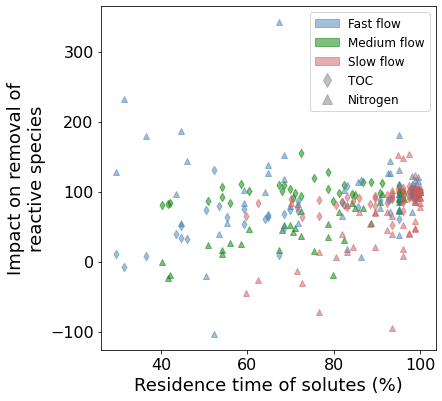

In [6]:
patchlist = [blue_patch, green_patch, red_patch, empty_square, grey_triangle]
#Plotting
finaldata = mfdata_comparison
gvarnames = finaldata.Chem.unique().tolist()
regimes = finaldata.Regime.unique().tolist()
plt.figure(figsize = (6,6))
for r in regimes:
    subset = finaldata[finaldata.Regime==r]
    for g in ["TOC", "Nitrogen"]:
        data = subset[subset.Chem==g]
        #plt.scatter(data["fraction"]*100, 100*data['reldelmassflux_spatial_fraction'], c = my_pal[r], marker = mymarklist[g], facecolor = "white", alpha = 0.5, label = g)
        plt.scatter(data["fraction"]*100, 100*data['reldelconc_spatial_fraction'], c = my_pal[r], marker = mymarklist[g], facecolor = "white", alpha = 0.5, label = g)
#plt.yscale("log")
#plt.yticks((40,100,300,600), (40,100,300,600))
plt.tick_params(labelsize = 16)
plt.legend(handles = patchlist, fontsize = 12)
plt.xlabel ("Residence time of solutes (%)", fontsize = 18)
plt.ylabel("Impact on removal of\nreactive species", fontsize = 18)
plt.subplots_adjust (top = 0.92)
picname = os.path.join(output_dir, "removal_impact.png")
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
#plt.savefig(os.path.join(output_dir, "removal_impact.pdf"), bbox_inches = 'tight', pad_inches = 0.1)

### Scatter plot of removal of reactive species in each domain with change in breakthrough time
- Nitrogen, DO and TOC
- Categorization by Da

<AxesSubplot:xlabel='Da63', ylabel='Count'>

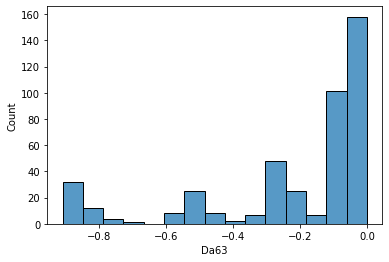

In [7]:
finaldata = mfdata_comparison[mfdata_comparison['Chem'].isin(["DOC", "Nitrate","Ammonium"])]#ogen", "DO"])]
sns.histplot(finaldata['Da63'])

<AxesSubplot:xlabel='Mean_saturation', ylabel='Count'>

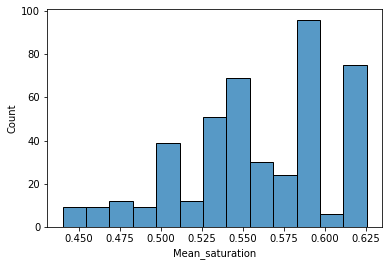

In [8]:
sns.histplot(finaldata['Mean_saturation'])

<ipython-input-9-c1285b2bc4a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldata['eff_sat'] = finaldata['Mean_saturation']/0.6-1/3


<AxesSubplot:xlabel='eff_sat', ylabel='Count'>

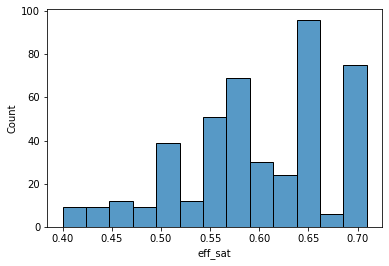

In [9]:
finaldata['eff_sat'] = finaldata['Mean_saturation']/0.6-1/3
sns.histplot(finaldata['eff_sat'])

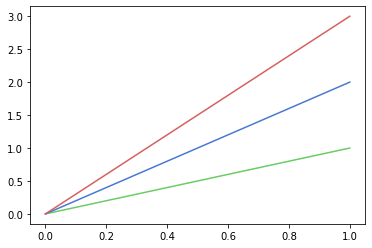

In [10]:
sns.set_color_codes("muted")
_ = plt.plot([0,1],color = "g")
_ = plt.plot([0,2], color = "b")
_= plt.plot([0,3], color = "r")
sns.set_palette("muted",3)
my_pal = {"Slow": "r", "Medium": "g", "Fast":"b"}

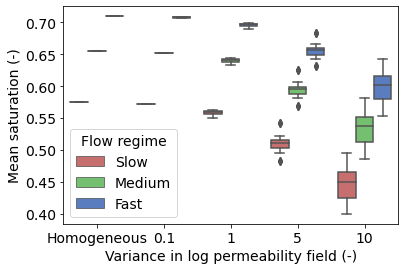

In [11]:
mfdata_comparison['eff_sat'] = mfdata_comparison['Mean_saturation']/0.6-1/3
import matplotlib as mpl
sns.boxplot(data = mfdata_comparison, y = "eff_sat", x= "Variance", hue ="Regime", hue_order = ["Slow", "Medium", "Fast"], palette = my_pal)
plt.xlabel ("Variance in log permeability field (-)", fontsize = 14)
plt.ylabel ("Mean saturation (-)", fontsize = 14)
xlocs, xlabels = plt.xticks()
plt.xticks(xlocs, ["Homogeneous", "0.1","1","5","10"])
plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))
plt.tick_params(labelsize = 14)
plt.legend(title = 'Flow regime', fontsize = 14, title_fontsize = 14)

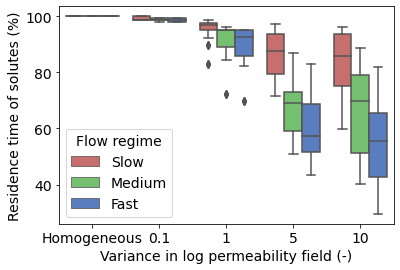

In [12]:
mfdata_comparison["fraction%"] = mfdata_comparison.fraction*100
sns.boxplot(data = mfdata_comparison, y = "fraction%", x= "Variance", hue ="Regime", hue_order = ["Slow", "Medium", "Fast"], palette = my_pal)
plt.xlabel ("Variance in log permeability field (-)", fontsize = 14)
plt.ylabel ("Residence time of solutes (%)", fontsize = 14)
locs, labels = plt.xticks()
plt.xticks(locs, ["Homogeneous", "0.1","1","5","10"])
plt.tick_params(labelsize = 14)
plt.legend(title = 'Flow regime', fontsize = 14, title_fontsize = 14)

<ipython-input-13-b7525d00277d>:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(picname, dpi = 300, pad = 0.1, layout = "tight")
<ipython-input-13-b7525d00277d>:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "layout" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(picname, dpi = 300, pad = 0.1, layout = "tight")


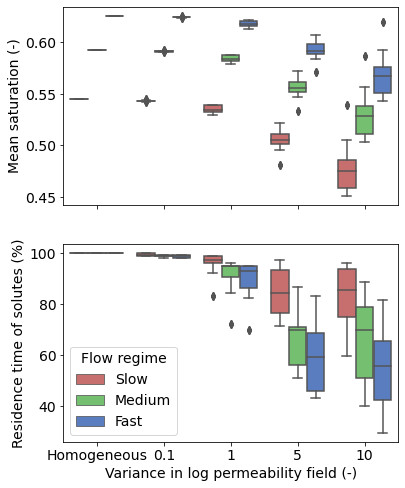

In [13]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (6,8),sharex = True)
sns.boxplot(data = mfdata_comparison, y = "Mean_saturation", x= "Variance", hue ="Regime",
            hue_order = ["Slow", "Medium", "Fast"], palette = my_pal, ax = axes.flat[0])
axes.flat[0].legend().set_visible(False)
sns.boxplot(data = mfdata_comparison, y = "fraction%", x= "Variance", hue ="Regime",
            hue_order = ["Slow", "Medium", "Fast"],palette = my_pal, ax = axes.flat[1])
axes.flat[0].set_xlabel ("")
plt.xlabel ("Variance in log permeability field (-)", fontsize = 14)
locs, labels = plt.xticks()
plt.xticks(locs, ["Homogeneous", "0.1","1","5","10"])
axes.flat[0].set_ylabel ("Mean saturation (-)", fontsize = 14)
axes.flat[0].get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))
axes.flat[1].set_ylabel ("Residence time of solutes (%)", fontsize = 14)
for ax in axes:
    ax.tick_params(labelsize = 14)
plt.legend(title = 'Flow regime', fontsize = 14, title_fontsize = 14)
picname = os.path.join(output_dir, "sat_time_het.png")
plt.savefig(picname, dpi = 300, pad = 0.1, layout = "tight")

In [6]:
blue_dot = mlines.Line2D([], [], linestyle = '', marker = "o", markerfacecolor = "steelblue", markeredgecolor = "steelblue", markersize=10, label='Da<-1', alpha = 0.5)
orange_triangle = mlines.Line2D([], [], linestyle = '', marker = "^", markerfacecolor = "orange", markeredgecolor = "orange",markersize=10, label='-1<Da<0', alpha = 0.5)
green_square = mlines.Line2D([], [], linestyle = '', marker = "s", markerfacecolor = "green", markeredgecolor = "green",markersize=10, label='0<Da<0.5', alpha = 0.5)
red_diamond = mlines.Line2D([], [], linestyle = '', marker = "d", markerfacecolor = "indianred", markeredgecolor = "indianred",markersize=10, label='Da>0.5', alpha = 0.5)
dapatchlist = [blue_dot, orange_triangle, green_square, red_diamond]
mfdata_comparison['Da_cat'] = mfdata_comparison['Da63']
mfdata_comparison.loc[mfdata_comparison["Da63"] < -1, "Da_cat"] = 0
mfdata_comparison.loc[(mfdata_comparison["Da63"] > -1) & (mfdata_comparison["Da63"] < 0), "Da_cat"] = 1
mfdata_comparison.loc[(mfdata_comparison["Da63"] > 0) & (mfdata_comparison["Da63"] <0.5), "Da_cat"] = 2
mfdata_comparison.loc[(mfdata_comparison["Da63"] > 0.5), "Da_cat"] = 3
labels = {3 : "Da > 0.5",
          2 : "0 < Da < 0.5",
          1 : "-1 < Da < 0",
         0 : "Da < -1"}
dacolors = {3 : "indianred",2 : "g",1 : "orange", 0 : "steelblue"}
damarkers = {3 : "d",2 : "s",1 : "^", 0 : "o"}

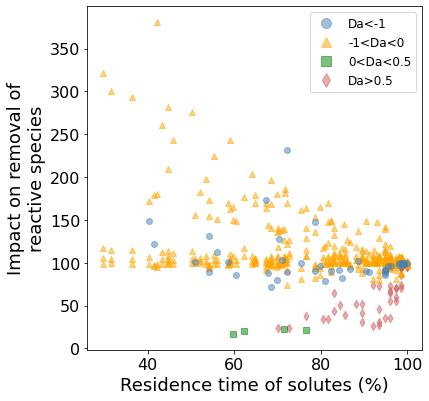

In [39]:
#Plotting
mfdata_comparison["rel_normconc"] = (1 - mfdata_comparison["normconc"])/(1 - mfdata_comparison["spatial_normconc_base"])
finaldata = mfdata_comparison[mfdata_comparison['Chem'].isin(["DOC","DO","Ammonium", "Nitrate"])]#"Nitrogen","TOC",
gvarnames = finaldata.Chem.unique().tolist()
regimes = finaldata.Regime.unique().tolist()
plt.figure(figsize = (6,6))
for da in [3,2,1,0]:
    data = finaldata[finaldata.Da_cat==da]
    plt.scatter(100*data["fraction"], 100*data['normconc_spatial_fraction'],
                c = dacolors[da],marker = damarkers[da], alpha = 0.5, label = labels[da])
#plt.yscale("log")
#plt.yticks((40,100,300,600), (40,100,300,600))
#plt.ylim(bottom = 0.0005)
plt.tick_params(labelsize = 16)
plt.legend(handles = dapatchlist, fontsize = 12)
plt.xlabel ("Residence time of solutes (%)", fontsize = 18)
plt.ylabel("Impact on removal of\nreactive species", fontsize = 18)
plt.subplots_adjust (top = 0.92)
picname = os.path.join(output_dir, "removal_impact.png")
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
#plt.savefig(os.path.join(output_dir, "removal_impact.pdf"), bbox_inches = 'tight', pad_inches = 0.1)

In [8]:
mfdata_comparison.Chem.unique()

array(['DOC', 'DO', 'Nitrate', 'Ammonium', 'Nitrogen', 'TOC'],
      dtype=object)

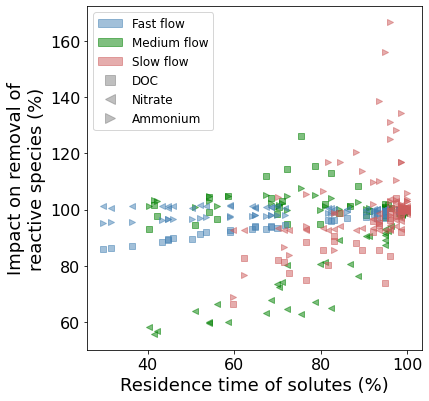

In [8]:
#Plotting
chempatchlist= [blue_patch, green_patch, red_patch, grey_square, empty_triangle, empty_diamond]
finaldata = mfdata_comparison[mfdata_comparison['Chem'].isin(["DOC", "Ammonium", "Nitrate","DO"])]
gvarnames = finaldata.Chem.unique().tolist()
regimes = finaldata.Regime.unique().tolist()
plt.figure(figsize = (6,6))
for r in regimes:
    subset = finaldata[finaldata.Regime==r]
    for g in ["DOC", "Ammonium", "Nitrate"]:
        data = subset[subset.Chem==g]
        #plt.scatter(data["fraction"]*100, 100*data['reldelmassflux_spatial_fraction'], c = my_pal[r], marker = mymarklist[g], facecolor = "white", alpha = 0.5, label = g)
        plt.scatter(data["fraction"]*100, 100/data['normconc_spatial_fraction'], c = my_pal[r], marker = mymarklist[g], facecolor = "white", alpha = 0.5, label = g)
#plt.yscale("log")
#plt.yticks((40,100,300,600), (40,100,300,600))
plt.tick_params(labelsize = 16)
plt.legend(handles = chempatchlist, fontsize = 12)
plt.xlabel ("Residence time of solutes (%)", fontsize = 18)
plt.ylabel("Impact on removal of\nreactive species (%)", fontsize = 18)
plt.subplots_adjust (top = 0.92)
picname = os.path.join(output_dir, "removal_impact.png")
plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)

### Aggregated results: Change in concentration of species: Takeaways

- Slow flow regime is not impacted by spatial heterogeneity
- Medium flow regime:
    - No impact on DO removal
    - DOC, nitrate and ammonium removal decreases with increasing heterogeneity
    - TOC is driven by the same dynamics as DOC.
- Fast flow regime:
    - DO, DOC, Ammonium removal decreases with increasing heterogeneity
    - Nitrate removal increases with heterogeneity
    - TOC removal increases - pointing to increasing export of POM/mobile microbial biomass (?) - **WIP**
    - Nitrogen removal (including POM and mobile biomass) removal is higher in the homogeneous domain. So the impact appears as negative (?). The concentration of nitrogen in the inlet is lower than that in the other scenarios while the concentration at the outlet is comparable. This is potentially a calculation mistake. - **WIP**
    
**Similar outputs are obtained if we plot impact on change in mass flux in the domain**

## Biomass: Concentration profiles-1D and 2D
* Defining the function for flux averaged concentrations of reactive species in 1D domain
* Defining the function for heatmaps of reactive species concentrations in 2D

In [18]:
def biomass2d(Trial):
    import matplotlib.gridspec as gridspec
    
    DIR = r"E:\Richards_Flow\/"
    Regimes = ["Slow", "Equal", "Fast"]
    trialist = proc.masterscenarios()
    species = proc.speciesdict("Unsaturated")
    iaspecies = list(g for g in species if ((species[g]["State"]=="Active") and (species[g]["Location"] == "Immobile")))
    gvarnames = list(g for g in iaspecies if (g != "Immobile active sulphate reducers"))
    sptitles = ["Aerobic\ndegraders", "Nitrate\nreducers", "Ammonia\noxidizers"]
    velindex = 2
    colorscheme = 'YlGnBu'
    columntitles = ["Velocity\ndistribution pattern", "Slow flow", "Medium flow", "Fast flow"]
    fig = plt.figure(figsize=(24, 12))
    outer = gridspec.GridSpec(4, 4, width_ratios = [0.2,1, 1, 1],wspace=0.15, hspace=0.3)
    pad = 0.28
    for t in Trial:
        file = DIR + "EqualAR_0/EqualAR_0_RF-A"+str(t)+"_df.npy"
        data = np.load(file)
        left = gridspec.GridSpecFromSubplotSpec(1, 1,subplot_spec=outer[4*Trial.index(t)],wspace=0.3,hspace=0.1)
        axe=plt.Subplot(fig, left[0])
        velocity=abs(data[velindex,-1,:,:])
        sns.heatmap(velocity,cmap=colorscheme,ax=axe,cbar=False)
        axe.set_ylabel ("Variance: "+str(trialist[t]["Het"])+" &\nAnisotropy: "+str(trialist[t]["Anis"]),
                       rotation="vertical",fontsize=18,ha="center")
        axe.set_xticks([])
        axe.set_yticks([])
        fig.add_subplot(axe)
        for r in Regimes:
            i=Trial.index(t)*len(Regimes)+Regimes.index(r)+Trial.index(t)+1
            if i%4!=0:
                inner = gridspec.GridSpecFromSubplotSpec(1,3,subplot_spec=outer[i],wspace=0.3,hspace=0.1)
                file = DIR+r+"AR_0/"+r+"AR_0_RF-A"+str(t)+"_df.npy"
                data = np.load(file)
                for g in gvarnames:
                    axe=plt.Subplot(fig,inner[gvarnames.index(g)])
                    sns.heatmap (data[species[g]["TecIndex"],-1,:,:],cmap=colorscheme,ax= axe)
                    axe.set_title(sptitles[gvarnames.index(g)],fontsize=13,ha="center")
                    axe.set_xticks([])
                    axe.set_yticks([])
                    fig.add_subplot(axe)
    for a in range(1,4,1):
        plt.annotate(columntitles[a],xy=(0.05, 0.05),xytext=(0.28 + (a-1)*pad, 0.95),
                    xycoords='figure fraction',textcoords='figure fraction',
                    size='large',ha='center',va='baseline',fontsize = 18)
    plt.annotate(columntitles[0],xy=(0.1, 0.92),xytext=(0.1, 0.913),xycoords='figure fraction',textcoords='figure fraction',size='large',ha='center',va='baseline',fontsize=18)
#    fig.show()
#picname = "Y:/Home/khurana/4. Publications/Restructuring/Paper1/Figurecodes/FigureB4_immobile_biomass_heatmaps.png"
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
#picname = "Y:/Home/khurana/4. Publications/Restructuring/Paper1/Figurecodes/FigureB4_immobile_biomass_heatmaps.pdf"
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)

    return None


In [19]:
biomass2d(["H","50","73","61"])

TypeError: masterscenarios() missing 1 required positional argument: 'flowregime'

### Biomass: 2D profile: Takeaways
- Biomass is distributed as expected and similar to saturated flow regime.
- Aerobes are persistent along preferential flowpaths where DO and DOC are also available.
- Nitrate reducers are persistent in low permeable regions where DO is not available to suppress their growth.
- Ammonia oxidizers are persistent in low permeable regions where DO concentration drops.

## Aggregated results: Biomass

### Import data and explore values

In [20]:
filename = "biomass_07062021.csv"
mfdata = pd.read_csv(os.path.join(results_dir, filename))
print(mfdata.shape)
print(mfdata.columns)
filename = "biomass_comparison_07062021.csv"
allbiomassdata = pd.read_csv(os.path.join(results_dir, filename))
print(allbiomassdata.shape)
print(allbiomassdata.columns)

(2064, 10)
Index(['Trial', 'Variance', 'Anisotropy', 'Regime', 'Chem', 'Biomass',
       'Biomass_contribution', 'Mean_saturation', 'Time', 'fraction'],
      dtype='object')
(2064, 14)
Index(['Trial', 'Variance', 'Anisotropy', 'Regime', 'Chem', 'Biomass',
       'Biomass_contribution', 'Mean_saturation', 'Time', 'fraction',
       'spatial_biomass_base', 'spatial_biomass_contribution_base',
       'biomass_spatial_fraction', 'biomass_contribution_spatial_fraction'],
      dtype='object')


In [21]:
# How many regimes and what are they called? Which chemical species?
print(mfdata.Regime.unique())
print(mfdata.Chem.unique())
print(allbiomassdata.Regime.unique())
print(allbiomassdata.Chem.unique())

['Medium' 'Fast' 'Slow']
['Immobile active aerobic degraders' 'Immobile active nitrate reducers'
 'Immobile active sulphate reducers' 'Immobile active ammonia oxidizers'
 'Mobile active aerobic degraders' 'Mobile active nitrate reducers'
 'Mobile active sulphate reducers' 'Mobile active ammonia oxidizers'
 'Immobile inactive aerobic degraders'
 'Immobile inactive nitrate reducers'
 'Immobile inactive sulphate reducers'
 'Immobile inactive ammonia oxidizers' 'Mobile inactive aerobic degraders'
 'Mobile inactive nitrate reducers' 'Mobile inactive sulphate reducers'
 'Mobile inactive ammonia oxidizers']
['Medium' 'Fast' 'Slow']
['Immobile active aerobic degraders' 'Immobile active nitrate reducers'
 'Immobile active sulphate reducers' 'Immobile active ammonia oxidizers'
 'Mobile active aerobic degraders' 'Mobile active nitrate reducers'
 'Mobile active sulphate reducers' 'Mobile active ammonia oxidizers'
 'Immobile inactive aerobic degraders'
 'Immobile inactive nitrate reducers'
 'Immobi

## Aggregate results: Biomass: Overall distribution between different fractions of microbial biomass

### Explore fractions between active immobile, active mobile, inactive immobile and inactive mobile biomass

Index(['Trial', 'Variance', 'Anisotropy', 'Regime', 'Chem', 'Biomass',
       'Biomass_contribution', 'Mean_saturation', 'Time', 'fraction',
       'spatial_biomass_base', 'spatial_biomass_contribution_base',
       'biomass_spatial_fraction', 'biomass_contribution_spatial_fraction',
       'State', 'Location'],
      dtype='object')
['Immobile active aerobic degraders', 'Immobile active nitrate reducers', 'Immobile active ammonia oxidizers', 'Mobile active aerobic degraders', 'Mobile active nitrate reducers', 'Mobile active ammonia oxidizers', 'Immobile inactive aerobic degraders', 'Immobile inactive nitrate reducers', 'Immobile inactive ammonia oxidizers', 'Mobile inactive aerobic degraders', 'Mobile inactive nitrate reducers', 'Mobile inactive ammonia oxidizers']


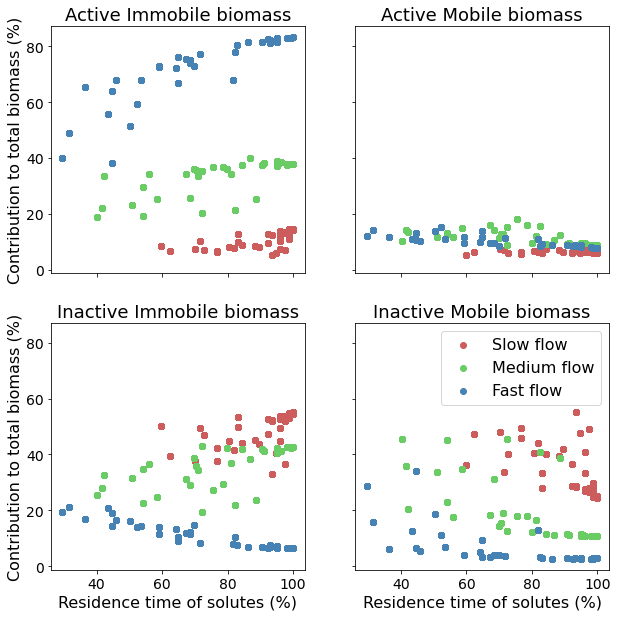

In [41]:
#Reactive species of concerns
States = ["Active", "Inactive"]
Locations = ["Mobile", "Immobile"]
allspecies = proc.speciesdict("Unsaturated")
microbialspecies = list(t for t in allspecies.keys() if allspecies[t]["State"] in States)
print(allbiomassdata.columns)
allbiomassdata['Regime'] = allbiomassdata['Regime'].replace({'Equal':'Medium'})
biomassdata = allbiomassdata
uniquespecies = biomassdata.Chem.unique().tolist()
for s in uniquespecies:
    biomassdata.loc[biomassdata.Chem == s, 'State'] = allspecies[s]["State"]
    biomassdata.loc[biomassdata.Chem == s, 'Location'] = allspecies[s]['Location']
col_dit = {'Slow':'indianred', 'Medium':'g', 'Fast':'steelblue'}
uniquespecies.remove('Immobile active sulphate reducers')
uniquespecies.remove('Immobile inactive sulphate reducers')
uniquespecies.remove('Mobile active sulphate reducers')
uniquespecies.remove('Mobile inactive sulphate reducers')
print(uniquespecies)
x = biomassdata.groupby(['Regime','Trial','State', 'Location'], as_index=False)['Biomass_contribution'].sum()
x = pd.merge(x, biomassdata[['Regime', 'Trial', 'Time', 'fraction']], on = ['Regime', 'Trial'])
fig, axeses = plt.subplots(2,2, sharex = True, sharey = True, figsize = (10,10))
i = 0
for a in ["Active", "Inactive"]:
    for l in ["Immobile", "Mobile"]:
        subdata = x[(x.State == a) & (x.Location == l)]
        ax = axeses.flat[i]
        ax.set_title(a + " " + l + " biomass", fontsize = 18)
        for r in ["Slow", "Medium", "Fast"]:
            data = subdata[subdata.Regime == r]
            ax.scatter(100*data.fraction, 100*data.Biomass_contribution, c = col_dit[r], label = r + " flow")
        i += 1
ax.legend(fontsize = 16)
axeses.flat[2].set_xlabel ("Residence time of solutes (%)", fontsize = 16)
axeses.flat[3].set_xlabel ("Residence time of solutes (%)", fontsize = 16)
axeses.flat[0].set_ylabel ("Contribution to total biomass (%)", fontsize = 16)
axeses.flat[2].set_ylabel ("Contribution to total biomass (%)", fontsize = 16)
for i in list(range(4)):
    axeses.flat[i].tick_params (labelsize = 14)
#plt.tick_params(fontsize=14)
plt.savefig(os.path.join(output_dir, "contribution_state_location_biomass.png"), dpi = 300)

### Takeaways

- Active immobile biomass contributes the highest to the total biomass in the fast flow regime. It decreases with increasing heterogeneity. The rate of reduction varies with the flow regime. The rate of reduction is the highest in the fast flow regime. Then in the medium flow regime, and there is almost no impact in the slow flow regime.
- *Minimal impact of heterogeneity and flow regime on active mobile biomass.*
- Inactive immobile biomass contributes the lowest in the fast flow regime (compared to the other flow regimes). Its contribution increases with spatial heterogeneity in the fast flow regime. The contribution of this fraction in medium and slow flow regimes is not affected by spatial heterogeneity.
- Inactive mobile biomass contributes the most to the total biomass in the slow flow regime (compared to other flow regimes). Inactive mobile biomass increases with spatial heterogeneity in all flow regimes, at seemingly the same rate (visual observation).
- Spatial heterogenetiy results in a shift from active immobile biomass to inactive immobile biomass in the fast flow regime, and inactive mobile biomass in the slow and medium flow regimes.

### Explore fractionation according to microbial species

Index(['Trial', 'Variance', 'Anisotropy', 'Regime', 'Chem', 'Biomass',
       'Biomass_contribution', 'Mean_saturation', 'Time', 'fraction',
       'spatial_biomass_base', 'spatial_biomass_contribution_base',
       'biomass_spatial_fraction', 'biomass_contribution_spatial_fraction',
       'State', 'Location'],
      dtype='object')
['Immobile active aerobic degraders', 'Immobile active nitrate reducers', 'Immobile active ammonia oxidizers', 'Mobile active aerobic degraders', 'Mobile active nitrate reducers', 'Mobile active ammonia oxidizers', 'Immobile inactive aerobic degraders', 'Immobile inactive nitrate reducers', 'Immobile inactive ammonia oxidizers', 'Mobile inactive aerobic degraders', 'Mobile inactive nitrate reducers', 'Mobile inactive ammonia oxidizers']


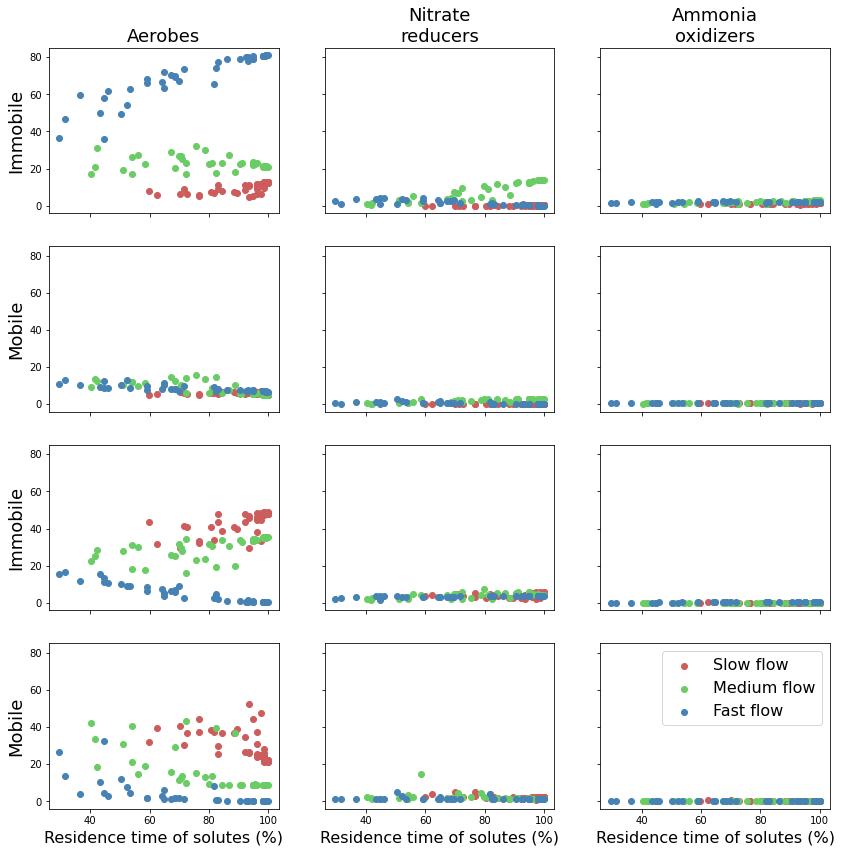

In [23]:
#Reactive species of concerns
States = ["Active", "Inactive"]
Locations = ["Mobile", "Immobile"]
allspecies = proc.speciesdict("Unsaturated")
microbialspecies = list(t for t in allspecies.keys() if allspecies[t]["State"] in States)
print(allbiomassdata.columns)
allbiomassdata['Regime'] = allbiomassdata['Regime'].replace({'Equal':'Medium'})
biomassdata = allbiomassdata
uniquespecies = biomassdata.Chem.unique().tolist()
for s in uniquespecies:
    biomassdata.loc[biomassdata.Chem == s, 'State'] = allspecies[s]["State"]
    biomassdata.loc[biomassdata.Chem == s, 'Location'] = allspecies[s]['Location']
col_dit = {'Slow':'indianred', 'Medium':'g', 'Fast':'steelblue'}
uniquespecies.remove('Immobile active sulphate reducers')
uniquespecies.remove('Immobile inactive sulphate reducers')
uniquespecies.remove('Mobile active sulphate reducers')
uniquespecies.remove('Mobile inactive sulphate reducers')
column_headers = ["Aerobes", "Nitrate\nreducers", "Ammonia\noxidizers"]
left_row = ["Immobile", "Mobile", "Immobile", "Mobile"]
right_row = ["Active", "Active", "Inactive", "Inactive"]
print(uniquespecies)
#x = biomassdata.groupby(['Regime','Trial','State', 'Location'], as_index=False)['Biomass_contribution'].sum()
#x = pd.merge(x, biomassdata[['Regime', 'Trial', 'Time', 'fraction']], on = ['Regime', 'Trial'])
fig, axeses = plt.subplots(4,3, sharex = True, sharey = True, figsize = (14,14))
i = 0
#for a in ["Active", "Inactive"]:
#    for l in ["Immobile", "Mobile"]:
for g in uniquespecies:
    subdata = biomassdata[biomassdata.Chem == g]
    ax = axeses.flat[uniquespecies.index(g)]
    if uniquespecies.index(g)<3:
        ax.set_title(column_headers[uniquespecies.index(g)], fontsize = 18)
    if uniquespecies.index(g)%3==0:
        ax.set_ylabel(left_row[int(uniquespecies.index(g)/3)], fontsize = 18)
    for r in ["Slow", "Medium", "Fast"]:
        data = subdata[subdata.Regime == r]
        ax.scatter(100*data.fraction, 100*data.Biomass_contribution, c = col_dit[r], label = r + " flow")
ax.legend(fontsize = 16)
for ax in axeses[-1,:]:
    ax.set_xlabel ("Residence time of solutes (%)", fontsize = 16)
#axeses.flat[3].set_xlabel ("Residence time of solutes (%)", fontsize = 16)
#axeses.flat[0].set_ylabel ("Contribution to total biomass (%)", fontsize = 16)
#axeses.flat[2].set_ylabel ("Contribution to total biomass (%)", fontsize = 16)
#plt.savefig(os.path.join(data_dir, "FigureS9_contribution_state_location_biomass.png"), dpi = 300)

### Takeaways

- Fast flow regime
 - The reduction in active immobile biomass with spatial heterogeneity is attributable to reduction in active immobile aerobes. The reduced active biomass mostly shifts to the inactive fractions.
 - In contrast, active immobile nitrate reducers increase with spatial heterogeneity. while the inactive fractions remain mostly constant. This points to an overall increase in contribution of nitrate reducers to the total biomass, with increased activity due to spatial heterogeneity.
 - No impact of spatial heterogeneity on ammonia oxidizers.

- Medium flow regime
 - Aerobes are not impacted by spatial heterogeneity barring a slight decrease in the contribution of immobile inactive fraction with increasing spatial heterogeneity. Possible that the overall biomass of aerobes is decreasing as the reduction in contribution of inactive immobile aerobes is not offset by an increase in contribution by other fractions.
 - Active immobile nitrate reducers decrease with increasing spatial heterogeneity, offset by both inactive immobile and mobile fractions. This makes sense since the aerobic zone expands a bit with increasing spatial heterogeneity leading to lower nitrate reduction friendly regions.
 - Ammonia oxidizers are not affected by spatial heterogeneity.

- Slow flow regime
 - Overall, slow flow regime is impacted the least by spatial heterogeneity.
 - The contribution of inactive immobile aerobes decreases with heterogeneity, and seemingly shifts to inactive immobile and mobile fractions of nitrate reducers.
 - Contribution of ammonia oxidizers is mostly the same regardless of spatial heterogeneity.

### Diffusion of DO vs removal of DO
- load all the ratesatfinish files
- identify the rate expression for DO removal and then diffusion of DO
- sum it up and do mass balance

In [5]:
def Convertetoarray(D, datatype, vertnodes, horiznodes):
    if (datatype == "tec"):
        steps = np.shape(D)[2]
        Headers = np.shape(D)[1]
        size = np.shape(D)[0]
        df2 = np.ndarray([Headers - 3, steps, vertnodes, horiznodes])
        for i in range(Headers - 3):
            counter = 0
            for j in range(steps):
                #           print (Headers[i+3])
                while counter < (j + 1) * size:
                    for k in range(vertnodes):
                        for l in range(horiznodes):
                            df2[i, j, k, l] = D[counter - (j) * size, i + 3, j]
                            counter = counter + 1
        df = np.ndarray([Headers - 3, steps, vertnodes, horiznodes])
        for j in range(vertnodes):
            df[:, :, vertnodes - 1 - j, :] = df2[:, :, j, :]
    elif (datatype == "rates"):
        Headers = np.shape(D)[1]
        size = np.shape(D)[0]
        df2 = np.ndarray([Headers, vertnodes, horiznodes])
        for i in range(Headers):
            counter = 0
            while counter < size:
                for k in range(vertnodes):
                    for l in range(horiznodes):
                        df2[i, k, l] = D[counter - size, i]
                        counter = counter + 1
        df = np.ndarray([Headers, vertnodes, horiznodes])
        for j in range(vertnodes):
            df[:, vertnodes - 1 - j, :] = df2[:, j, :]        
    return df

In [6]:
allrates = proc.masterrates("Unsaturated")
allrates

['Fixedaeroresp',
 'Mobaeroresp',
 'Fixedaerogwth',
 'Mobaerogwth',
 'Fixedactaerodett',
 'Fixedinaerodett',
 'Mobactaeroattach',
 'Mobinaeroattach',
 'FixeddeactlowDOX',
 'MobdeactlowDOX',
 'Fixedaeroreact',
 'Mobaeroreact',
 'Mortfixedactaero',
 'Mortmobactaero',
 'Mortinfixedaero',
 'Mortinmobaero',
 'Fixednitraresp',
 'Mobnitraresp',
 'Fixednitragwth',
 'Mobnitragwth',
 'Fixedactnitradett',
 'Fixedinnitradett',
 'Mobactnitraattach',
 'Mobinnitraattach',
 'FixeddeactlowN',
 'MobdeactlowN',
 'Fixednitrareact',
 'Mobnitrareact',
 'Mortfixedactnitra',
 'Mortmobactnitra',
 'Mortinfixednitra',
 'Mortinmobnitra',
 'Fixedsulpharesp',
 'Mobsulpharesp',
 'Fixedsulphagwth',
 'Mobsulphagwth',
 'Fixedactsulphadett',
 'Fixedinsulphadett',
 'Mobactsulphaattach',
 'Mobinsulphaattach',
 'FixedDeactlowS',
 'MobDeactlowS',
 'Fixedsulphareact',
 'Mobsulphareact',
 'Mortfixedactsulpha',
 'Mortmobactsulpha',
 'Mortinfixedsulpha',
 'Mortinmobsulpha',
 'Fixedammresp',
 'Mobammresp',
 'Fixedammgwth',
 'Mob

In [7]:
print(len(allrates))

67


In [8]:
aerorates = ['Fixedaeroresp', 'Mobaeroresp','Fixedammresp','Mobammresp','DOdiffusion']

In [9]:
ratesind = list(19+allrates.index(a) for a in aerorates)

In [10]:
Regimes = ["Medium","Slow","Fast"]
trialist = proc.masterscenarios("Unsaturated")
mTrial = list(trialist.keys())
droplist = ["98","165","185"]
Trial = list(t for t in mTrial if t not in droplist)

In [12]:
row = []
for r in Regimes:
    reg_dir = os.path.join("X:/Richards_flow_big_sat", r+"AR_0")
    for t in Trial:
        path = os.path.join(reg_dir, "RF-A"+str(t),"ratesAtFinish.dat")
        print(r,t)
        rates = np.loadtxt(path, usecols = ratesind, delimiter = ' ')
        rates_array = Convertetoarray(rates, "rates", 113, 61)
        corners = (np.sum(rates_array[:-1,6,0]+rates_array[:-1,6,-1]+rates_array[:-1,-7,0]+rates_array[:-1,-7,-1], axis = 0)-
                         rates_array[-1,6,0]-rates_array[-1,6,-1]-rates_array[-1,-7,0]-rates_array[-1,-7,-1])*0.0025*0.0025
        boundary = np.sum(np.sum(rates_array[:-1,6,1:-1]+rates_array[:-1,-7,1:-1],axis = 0)-
                          rates_array[-1,6,1:-1]-rates_array[-1,-7,1:-1])*0.0025*0.005+np.sum(np.sum(rates_array[:-1,6:-6,0]+rates_array[:-1,6:-6,-1],axis = 0)-
                          rates_array[-1,6:-6,0]-rates_array[-1,6:-6,-1])*0.0025*0.005
        elem = np.sum(np.sum(rates_array[:-1,6:-6,1:-1]+rates_array[:-1,6:-6,1:-1],axis = 0)-
                          rates_array[-1,6:-6,1:-1])*0.005*0.005
        netdorem = corners+boundary+elem
        row.append([r,t,"DO",netdorem])

Medium H
Medium 37
Medium 38
Medium 39
Medium 46
Medium 47
Medium 48
Medium 55
Medium 56
Medium 57
Medium 64
Medium 65
Medium 66
Medium 40
Medium 41
Medium 49
Medium 50
Medium 51
Medium 54
Medium 58
Medium 59
Medium 60
Medium 62
Medium 67
Medium 68
Medium 69
Medium 72
Medium 76
Medium 82
Medium 84
Medium 89
Medium 90
Medium 107
Medium 111
Medium 114
Medium 116
Medium 118
Medium 119
Medium 125
Medium 127
Medium 128
Medium 137
Medium 142
Medium 174
Medium 177
Medium 182
Slow H
Slow 37
Slow 38
Slow 39
Slow 46
Slow 47
Slow 48
Slow 55
Slow 56
Slow 57
Slow 64
Slow 65
Slow 66
Slow 40
Slow 41
Slow 49
Slow 50
Slow 51
Slow 54
Slow 58
Slow 59
Slow 60
Slow 62
Slow 67
Slow 68
Slow 69
Slow 72
Slow 76
Slow 82
Slow 84
Slow 89
Slow 90
Slow 107
Slow 111
Slow 114
Slow 116
Slow 118
Slow 119
Slow 125
Slow 127
Slow 128
Slow 137
Slow 142
Slow 174
Slow 177
Slow 182
Fast H
Fast 37
Fast 38
Fast 39
Fast 46
Fast 47
Fast 48
Fast 55
Fast 56
Fast 57
Fast 64
Fast 65
Fast 66
Fast 40
Fast 41
Fast 49
Fast 50
Fast 51
Fas

In [19]:
netdorem = pd.DataFrame.from_records(row, columns = ["Regime", "Trial", "Chem","DOrem"])

In [20]:
sat_dorem = pd.merge(mfdata_comparison, netdorem, on = ["Regime", "Trial", "Chem"])

In [21]:
sat_dorem.head()

,Trial,Variance,Anisotropy,Regime,Chem,conc_in,conc_out,delconc,reldelconc,normconc,Mean_saturation,Time,fraction,spatial_normconc_base,spatial_reldelconc_base,normconc_spatial_fraction,reldelconc_spatial_fraction,Da63,DOrem
0,H,0.0,1,Medium,DO,133.650018,5.216844,128.433174,96.096638,0.039034,0.592655,15.9,1.000000,0.039034,96.096638,1.000000,1.000000,-1.408561,4.935861
1,37,0.1,2,Medium,DO,135.518645,5.146724,130.371921,96.202202,0.037978,0.591020,15.6,0.981132,0.039034,96.096638,0.972955,1.001099,-1.420468,4.945655
2,38,0.1,5,Medium,DO,135.855297,5.188921,130.666376,96.180553,0.038194,0.591248,15.7,0.987421,0.039034,96.096638,0.978502,1.000873,-1.418000,4.942908
3,39,0.1,10,Medium,DO,135.234620,5.202476,130.032144,96.153000,0.038470,0.591516,15.8,0.993711,0.039034,96.096638,0.985561,1.000587,-1.414878,4.939195
4,46,0.1,2,Medium,DO,134.784406,5.206049,129.578357,96.137499,0.038625,0.591410,15.8,0.993711,0.039034,96.096638,0.989532,1.000425,-1.413131,4.949671


In [22]:
for r in Regimes:
    base = sat_dorem[(sat_dorem['Regime']==r) & (sat_dorem['Trial']=="H")]["DOrem"].values[0]
    for t in Trial:
        sat_dorem.loc[(sat_dorem['Regime']==r) & (sat_dorem['Trial']==t),"DOrem_base"]=base
sat_dorem['DOrem_fraction'] = sat_dorem['DOrem']/sat_dorem['DOrem_base']
sat_dorem['DOrem_fraction%'] = sat_dorem['DOrem_fraction']*100

In [23]:
sat_dorem.to_csv(os.path.join(results_dir,"DO_consumption_unsat_het.csv"), index =False)

In [17]:
#Plotting
chempatchlist= [blue_patch, green_patch, red_patch, grey_dot]
finaldata = sat_dorem
gvarnames = finaldata.Chem.unique().tolist()
regimes = finaldata.Regime.unique().tolist()
plt.figure(figsize = (6,6))
for r in regimes:
    subset = finaldata[finaldata.Regime==r]
    for g in ["DOC", "Ammonium", "Nitrate","DO"]:
        data = subset[subset.Chem==g]
        #plt.scatter(data["fraction"]*100, 100*data['reldelmassflux_spatial_fraction'], c = my_pal[r], marker = mymarklist[g], facecolor = "white", alpha = 0.5, label = g)
        plt.scatter(data["Mean_saturation"], data['DOrem'], c = my_pal[r], marker = mymarklist[g], facecolor = "white", alpha = 0.5, label = g)
#plt.yscale("log")
#plt.yticks((40,100,300,600), (40,100,300,600))
plt.tick_params(labelsize = 16)
plt.legend(handles = chempatchlist, fontsize = 12)
plt.xlabel ("Mean saturation in domain", fontsize = 18)
plt.ylabel("Impact on removal of\nreactive species", fontsize = 18)
plt.subplots_adjust (top = 0.92)
picname = os.path.join(output_dir, "removal_impact.png")
plt.ylim((5,10))
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
#plt.savefig(os.path.join(output_dir, "removal_impact.pdf"), bbox_inches = 'tight', pad_inches = 0.1)

NameError: name 'blue_patch' is not defined

In [18]:
chempatchlist= [blue_patch, green_patch, red_patch]
finaldata=sat_dorem
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4),sharey = True)
for r in regimes:
    subset = finaldata[finaldata.Regime==r]
    for g in ["DO"]:
        data = subset[subset.Chem==g]
        axes.flat[0].scatter(data["Mean_saturation"], data['DOrem_fraction'], c = my_pal[r], marker = mymarklist[g], facecolor = "white", alpha = 0.5, label = g)
        axes.flat[0].set_xlabel ("Mean saturation\nin domain", fontsize = 16)
        axes.flat[0].set_ylabel("Impact on rate of\nconsumption of DO (%)", fontsize = 16)
        axes.flat[1].scatter(data["fraction"]*100, data['DOrem_fraction'], c = my_pal[r], marker = mymarklist[g], facecolor = "white", alpha = 0.5, label = g)
        axes.flat[1].set_xlabel ("Residence time\nof solutes (%)", fontsize = 16)
        axes.flat[1].set_ylabel("")
for ax in axes:
    ax.tick_params(labelsize = 14)
plt.legend(handles = chempatchlist, title = 'Flow regime', fontsize = 12,title_fontsize = 12, bbox_to_anchor = (0.7,-0.3),
          ncol=3)
#picname = os.path.join(output_dir, "removal_do.png")
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)

NameError: name 'blue_patch' is not defined

In [ ]:

finaldata = sat_dorem
gvarnames = finaldata.Chem.unique().tolist()
regimes = finaldata.Regime.unique().tolist()
plt.figure(figsize = (6,6))



sns.boxplot(data = sat_dorem, y = "Mean_saturation", x= "Variance", hue ="Regime",
            hue_order = ["Slow", "Medium", "Fast"], palette = my_pal, ax = axes.flat[0])
axes.flat[0].legend().set_visible(False)
sns.boxplot(data = sat_dorem, y = "fraction%", x= "Variance", hue ="Regime",
            hue_order = ["Slow", "Medium", "Fast"],palette = my_pal, ax = axes.flat[1])
axes.flat[0].set_xlabel ("")
plt.xlabel ("Variance in log permeability field (-)", fontsize = 14)
locs, labels = plt.xticks()
plt.xticks(locs, ["Homogeneous", "0.1","1","5","10"])
axes.flat[0].set_ylabel ("Mean saturation (-)", fontsize = 14)
axes.flat[0].get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))
axes.flat[1].set_ylabel ("Residence time of solutes (%)", fontsize = 14)
for ax in axes:
    ax.tick_params(labelsize = 14)
plt.legend(title = 'Flow regime', fontsize = 14, title_fontsize = 14)
picname = os.path.join(output_dir, "sat_time_het.png")
plt.savefig(picname, dpi = 300, pad = 0.1, layout = "tight")
